In [2]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

### Defining the Parameters

In [39]:
# Parameters
n_arms = 10
n_plays = 2000
epsilon = 0.1

# Generate random reward probabilities for each arm
reward_probabilities = np.random.rand(n_arms)

q_values = np.zeros(n_arms)  # Estimated values of each arm
n_selected = np.zeros(n_arms)  # Number of times each arm was selected
total_reward = 0
rewards = []
optimal_action_count = []


In [40]:
# Run the bandit algorithm
for play in range(n_plays):
    # Exploration vs exploitation
    if np.random.rand() < epsilon:
        # Explore: select a random arm
        chosen_arm = np.random.choice(n_arms)
    else:
        # Exploit: select the arm with the highest estimated value
        chosen_arm = np.argmax(q_values)

    # Simulate pulling the arm
    reward = np.random.rand() < reward_probabilities[chosen_arm]
    rewards.append(reward)
    total_reward += reward
    n_selected[chosen_arm] += 1

    # Update the estimated value (Q-value) for the chosen arm
    q_values[chosen_arm] += (reward - q_values[chosen_arm]) / n_selected[chosen_arm]

    # Check if the optimal arm is chosen
    optimal_arm = np.argmax(reward_probabilities)
    is_optimal = chosen_arm == optimal_arm
    optimal_action_count.append(is_optimal)



In [41]:
# Calculate percentage of optimal actions
optimal_action_percentage = np.mean(optimal_action_count) * 100

# Results
#q_values, total_reward, optimal_action_percentage, rewards


In [42]:
print("Q-values for the arms:", q_values)
print("Total reward:", total_reward)
print("Percentage of optimal action:", optimal_action_percentage)
print("Rewards:", rewards)

Q-values for the arms: [0.2        0.77272727 0.84615385 0.86823004 0.47619048 0.11538462
 0.2        0.61538462 0.33333333 0.57142857]
Total reward: 1652
Percentage of optimal action: 89.55
Rewards: [True, True, True, False, False, True, False, False, False, True, False, False, True, True, True, False, False, False, True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, T

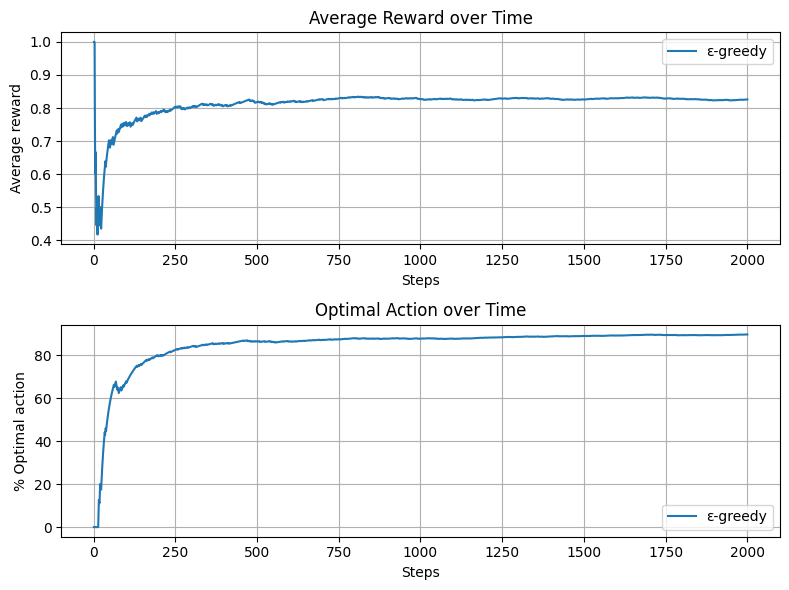

In [44]:
import matplotlib.pyplot as plt

steps = list(range(1, n_plays + 1))
average_rewards = [sum(rewards[:i]) / i for i in steps]
optimal_action_percentages = [sum(optimal_action_count[:i]) / i * 100 for i in steps]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot average rewards
ax1.plot(steps, average_rewards, label='ε-greedy')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Average reward')
ax1.set_title('Average Reward over Time')
ax1.legend()
ax1.grid(True)

# Plot percentage of optimal actions
ax2.plot(steps, optimal_action_percentages, label='ε-greedy')
ax2.set_xlabel('Steps')
ax2.set_ylabel('% Optimal action')
ax2.set_title('Optimal Action over Time')
ax2.legend()
ax2.grid(True)

# Tight layout to ensure there's no overlap
plt.tight_layout()

# Show the plot
plt.show()
